# Graphics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Heat Kernel

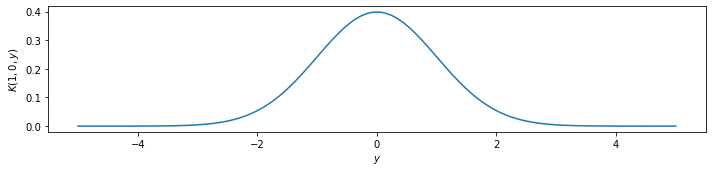

In [2]:
alpha = 1 / 2
d = 1
K = lambda t, x, y: (4 * np.pi * alpha * t) ** (-d / 2) * np.exp(-(np.abs(x - y) ** 2) / (4 * alpha * t))
t = 1
x = 0
y = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 2.5))
#plt.title('Noyau de la chaleur')
plt.plot(y, K(t, x, y))
plt.xlabel('$y$')
plt.ylabel('$K(1, 0, y)$')
plt.tight_layout()
plt.savefig('heatKernel.png', transparent=True)

## Cover image

In [3]:
piCreature = plt.imread('piCreature.png')
fire = plt.imread('fire.jpg')  # http://designbeep.com/2012/09/04/32-free-high-resolution-fire-textures-for-designers/
ice = plt.imread('ice.jpg')  # http://www.antarcticglaciers.org/antarctica-2/photographs/ice-textures-and-patterns/

px, py, _ = piCreature.shape
fx, fy, _ = fire.shape
ix, iy, _ = ice.shape

fxx = np.arange(0, fx - 1, fx // px)
fyy = np.arange(0, fy - 1, fy // py)
fireResize = fire[fxx, :, :]
fireResize = fireResize[:, fyy, :]
ixx = np.arange(0, ix - 1, ix // px)
iyy = np.arange(0, iy - 1, iy // py)
iceResize = ice[ixx, :, :]
iceResize = iceResize[:, iyy, :]
fireCut = fireResize[:px, :py, :]
iceCut = ice[:px, :py, :]

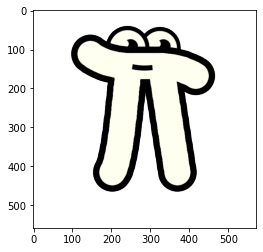

In [4]:
plt.imshow(piCreature)

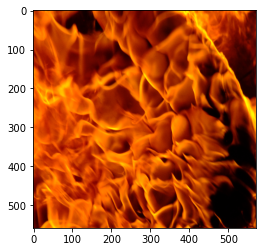

In [5]:
plt.imshow(fireCut)

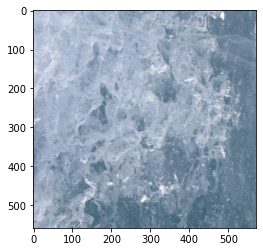

In [6]:
plt.imshow(iceCut)

In [7]:
newPi = piCreature.copy()[..., :3]
newPi2 = piCreature.copy()[..., :3]
newPi[piCreature[..., 3] !=0] = (piCreature[..., :3] * fireCut)[piCreature[..., 3] !=0] / 255
newPi2[piCreature[..., 3] ==0] = (piCreature[..., :3] * iceCut)[piCreature[..., 3] ==0] / 255
# end = np.maximum(np.minimum(newPi + newPi2 - 1, 1), 0)
end = (newPi + newPi2) / 2
layer = np.ones((px, py))

In [8]:
# https://towardsdatascience.com/image-processing-with-python-5b35320a4f3c

# Gaussian formula
def gaus(std, mean, x):
    return (1/(std))*np.e**(-(x-mean)**2/(2*std**2))
  
# function used to normalize values to between 0-1
def norm(vals):
    return [(v-min(vals))/(max(vals)-min(vals)) for v in vals]
  
# function to build x/y Gaussian function from width (x) and height (y)
def build_gaus(width, height):
    # get a uniform range of floats in the range 0-1 for the x/y axes
    x_vals = np.arange(0, width, 1)
    y_vals = np.arange(0, height, 1)
    
    # calculate standard deviation/mean - meaningless in this case
    # but required to produce Gaussian
    x_std, y_std = np.std(x_vals), np.std(y_vals)
    x_m, y_m = np.mean(x_vals), np.mean(y_vals)

    # create Gaussians for both x/y axes
    x_gaussian = [gaus(x_std, x_m, x) for x in x_vals]
    y_gaussian = [gaus(y_std, y_m, y) for y in y_vals]

    # normalize the Gaussian to 0-1
    x_gaussian = np.array(norm(x_gaussian))
    y_gaussian = np.array(norm(y_gaussian))
    
    return x_gaussian, y_gaussian

# first we build our x/y Gaussian functions
x_gaus, y_gaus = build_gaus(layer.shape[0], layer.shape[1])

factor = 0.5
# apply the Gaussian functions to our image array
layer = layer * (x_gaus**factor)[:, None]
layer = layer * (y_gaus**factor)[None, :]  # factor changes vignette strength
#layer = layer.T  # transpose back to original shape

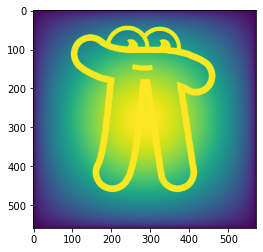

In [9]:
layer[piCreature[..., 0] < 0.5] = 1
plt.imshow(layer)

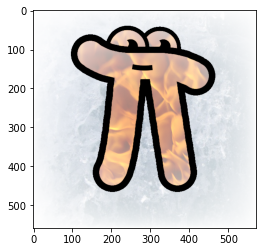

In [10]:
final = np.concatenate((end, layer[:, :, None]), axis=2)
plt.imshow(final)
im = Image.fromarray((final * 255).astype(np.uint8))
im.save("cover.png")

In [11]:
orange = np.array([179, 3, 38])
blue = np.array([58, 76, 192])
newPi3 = piCreature.copy()[..., :3]
newPi4 = piCreature.copy()[..., :3]
newPi3[piCreature[..., 3] !=0] = (piCreature[..., :3] * orange)[piCreature[..., 3] !=0] / 255
newPi4[piCreature[..., 3] ==0] = (piCreature[..., :3] * blue)[piCreature[..., 3] ==0] / 255
end2 = np.maximum(np.minimum(newPi3 + newPi4 - 1, 1), 0)

In [12]:
im = Image.fromarray((end2 * 255).astype(np.uint8))
im.save("contact.png")